<a href="https://colab.research.google.com/github/hansuho113/Machine_learning/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_10%EC%A3%BC%EC%B0%A8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import Perceptron

# 훈련 집합 구축
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [-1, 1, 1, 1]

# fitting the perceptron model
p = Perceptron()
p.fit(X, y)

print(f"학습된 퍼셉트론 모델의 매개변수: {p.coef_, p.intercept_}")
print(f"훈련집합에 대한 예측: {p.predict(X)}")
print(f"정확률 예측: {p.score(X, y)*100} %")

학습된 퍼셉트론 모델의 매개변수: (array([[2., 2.]]), array([-1.]))
훈련집합에 대한 예측: [-1  1  1  1]
정확률 예측: 100.0 %


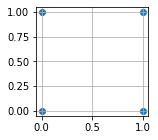

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(2, 2))
plt.scatter([x[0] for x in X], [y[1] for y in X])
plt.grid()
plt.show()

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

digit = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.6)

p = Perceptron(max_iter=100, eta0=0.001, verbose=0)
p.fit(X_train, y_train)

res = p.predict(X_test)

conf = np.zeros((10, 10))

for i in range(len(res)):
    conf[res[i]][y_test[i]] += 1
print(conf)

no_correct = 0
for i in range(10):
    no_correct += conf[i][i]
acc = no_correct / len(res)

print(f"테스트 집합에 대한 정확률: {acc*100}%")

[[81.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0. 52.  0.  0.  0.  0.  0.  0.  1.  4.]
 [ 0.  0. 53.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  2.  5. 68.  0.  0.  0.  0.  1.  9.]
 [ 0.  0.  0.  0. 76.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0. 62.  0.  1.  0.  2.]
 [ 0.  0.  0.  0.  0.  0. 68.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 70.  0.  0.]
 [ 1. 18.  9.  2.  3.  4.  5.  0. 67.  9.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 43.]]
테스트 집합에 대한 정확률: 89.01251738525731%


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100),
                    learning_rate_init=0.001,
                    batch_size=32,
                    max_iter=300,
                    solver='sgd',
                    verbose=False)
mlp.fit(X_train, y_train)
res = mlp.predict(X_test)

conf = np.zeros((10, 10))
for i in range(len(res)):
    conf[res[i]][y_test[i]] += 1
print(res)
print(conf)

wrong = 0
for i in range(10):
    wrong += conf[i][i]
acc = wrong / len(res)

print(f"테스트 집합에 대한 정확률: {acc*100}%")

[2 6 8 5 8 8 2 9 8 6 5 9 9 0 0 2 6 0 1 4 9 2 9 5 3 6 1 4 2 1 9 8 2 6 8 0 5
 8 5 7 3 4 9 2 4 7 8 7 4 4 4 7 9 5 5 4 7 7 9 0 7 7 7 2 7 4 2 8 4 4 8 7 0 0
 8 0 0 9 9 7 0 8 3 8 7 2 9 5 5 4 3 9 3 8 5 2 7 4 5 1 8 6 2 1 4 6 3 9 2 3 2
 0 2 3 6 6 6 3 2 0 8 3 4 6 8 6 2 7 2 5 4 7 9 0 3 6 8 1 9 8 1 1 7 7 0 5 0 9
 9 5 2 5 7 3 6 5 8 4 5 9 9 1 6 0 8 3 9 6 2 3 0 9 4 6 7 7 7 6 9 3 6 3 4 6 5
 0 2 6 2 7 8 6 2 4 4 8 5 3 1 6 0 9 4 4 4 8 9 7 2 6 6 3 8 6 1 2 5 0 8 0 2 4
 3 0 4 1 8 0 9 1 4 3 4 4 4 9 6 5 8 1 9 3 8 5 3 6 7 2 1 1 0 1 6 9 2 1 1 0 2
 3 5 9 5 6 3 4 4 0 7 1 3 5 9 9 0 0 2 0 3 9 6 3 8 0 3 3 7 9 6 0 6 5 4 1 8 1
 1 3 0 9 0 1 1 8 3 5 1 4 3 3 3 2 2 0 6 9 4 5 5 2 0 1 2 9 3 7 3 9 6 0 0 1 9
 0 7 2 0 1 4 4 0 2 4 6 7 3 7 8 9 7 8 6 0 5 9 6 1 7 2 9 5 6 1 5 3 0 3 9 6 8
 1 6 9 5 5 7 6 3 8 4 8 7 7 0 9 8 8 7 6 3 0 1 7 1 7 1 1 8 4 3 2 8 4 9 1 6 3
 6 6 2 6 1 7 6 4 8 0 0 7 4 7 4 8 8 4 2 7 7 2 7 2 3 5 8 0 9 9 2 1 7 9 0 9 8
 9 4 1 1 6 0 7 2 2 3 1 0 4 2 0 1 2 6 7 8 0 2 0 4 8 1 1 8 2 6 4 6 6 4 9 1 4
 6 3 5 7 0 0 9 4 5 7 5 4 

In [ ]:
from sklearn.datasets import fetch_openml

# mnist = fetch_openml('mnist_784')
mnist.data = mnist.data/255.0 # [0, 255] -> [0, 1]
X_train = mnist.data[:60000]
X_test = mnist.data[60000:]
y_train = np.int16(mnist.target[:60000])
y_test = np.int16(mnist.target[60000:])

mlp = MLPClassifier(hidden_layer_sizes=(100),
                    learning_rate_init=0.001,
                    batch_size=512,
                    max_iter=300,
                    solver='adam',
                    verbose=True)
mlp.fit(X_train, y_train)

res = mlp.predict(X_test)

conf = np.zeros((10, 10))
for i in range(len(res)):
    conf[res[i]][y_test[i]] += 1
print(conf)
wrong = 0
for i in range(10):
    wrong += conf[i][i]
acc = wrong / len(res)

print(f"테스트 집합에 대한 정확률: {acc*100} %")

Iteration 1, loss = 2.30331299
Iteration 2, loss = 2.30121981
Iteration 3, loss = 2.30113123
Iteration 4, loss = 2.30107356
Iteration 5, loss = 2.30101944
Iteration 6, loss = 2.30090360
Iteration 7, loss = 2.30087825
Iteration 8, loss = 2.30082570
Iteration 9, loss = 2.30071873
Iteration 10, loss = 2.30060307
Iteration 11, loss = 2.30052068
Iteration 12, loss = 2.30046097
Iteration 13, loss = 2.30031870
Iteration 14, loss = 2.30019626
Iteration 15, loss = 2.29995212
Iteration 16, loss = 2.29972903
Iteration 17, loss = 2.29955428
Iteration 18, loss = 2.29919385
Iteration 19, loss = 2.29888260
Iteration 20, loss = 2.29849434
Iteration 21, loss = 2.29804429
Iteration 22, loss = 2.29761681
Iteration 23, loss = 2.29700906
Iteration 24, loss = 2.29632467
Iteration 25, loss = 2.29565687
Iteration 26, loss = 2.29484556
[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]
 [   0.    0.    0.    0.    0.    0.    0.    0.  

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
mnist = fetch_openml('mnist_784')
mnist.data = mnist.data/255.0 # [0,255] 범위를 [0,1] 범위로 변환
x_train = mnist.data[:60000]
x_test = mnist.data[60000:]
y_train = np.int16(mnist.target[:60000])
y_test = np.int16(mnist.target[60000:])

# MLP 분류기 모델을 학습
mlp = MLPClassifier(hidden_layer_sizes = (100), learning_rate_init = 0.001, batch_size = 512, max_iter = 300, solver = 'adam', verbose = True)
mlp.fit(x_train, y_train) # digit 데이터로 모델링 (모델 학습)

# 테스트 집합으로 예측
res = mlp.predict(x_test)  

# 혼동 행렬 
conf = np.zeros((10,10))

for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

# 정확률 계산
no_correct = 0
for i in range(10):
  no_correct += conf[i][i]
accuracy = no_correct/len(res)
print('\n테스트 집합에 대한 정확률은 ', accuracy*100,"%입니다.")

Iteration 1, loss = 0.64712557
Iteration 2, loss = 0.26321557
Iteration 3, loss = 0.20864298
Iteration 4, loss = 0.17427927
Iteration 5, loss = 0.14945770
Iteration 6, loss = 0.13059023
Iteration 7, loss = 0.11578002
Iteration 8, loss = 0.10452762
Iteration 9, loss = 0.09468527
Iteration 10, loss = 0.08626504
Iteration 11, loss = 0.07787835
Iteration 12, loss = 0.07200217
Iteration 13, loss = 0.06607073
Iteration 14, loss = 0.06149944
Iteration 15, loss = 0.05626172
Iteration 16, loss = 0.05274248
Iteration 17, loss = 0.04851572
Iteration 18, loss = 0.04504046
Iteration 19, loss = 0.04235467
Iteration 20, loss = 0.03912932
Iteration 21, loss = 0.03647992
Iteration 22, loss = 0.03382810
Iteration 23, loss = 0.03116342
Iteration 24, loss = 0.02875322
Iteration 25, loss = 0.02700011
Iteration 26, loss = 0.02513728
Iteration 27, loss = 0.02403249
Iteration 28, loss = 0.02137968
Iteration 29, loss = 0.02004805
Iteration 30, loss = 0.01907064
Iteration 31, loss = 0.01766682
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
